### Titanic Arbolesde decisión 
### Proyecto de Machine Learning Aplicado
### Erick Sanabria 09003788

In [2]:
#importando librerias
import pandas as pd
datos = pd.read_csv("train.csv")

In [3]:
#revismos las data para ver las columnas y tipo de información
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#sacamos estadísticas básicas que nos pueden dar una idea de como esta la distribución de la  data
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

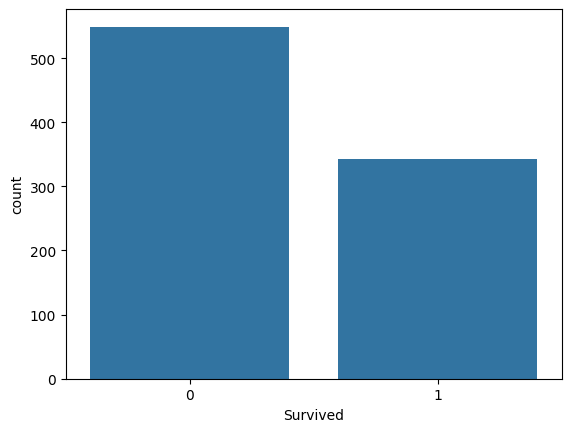

In [5]:
#importamos seaborn para gráficar
import seaborn as sb
#verificamos cuanta data de sobrevivinetes y no sobrevivientes hay (es decir como estan nuestras clases objetivo)
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

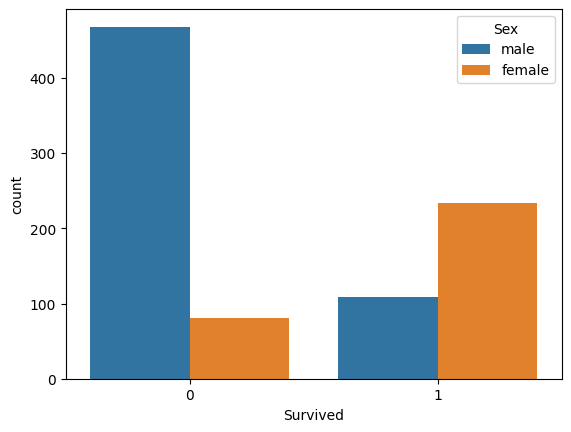

In [6]:
#verificamos nuestras clases objetivo con la caraterística de genero 
sb.countplot(x="Survived", data=datos, hue="Sex")

In [7]:
#verificamos cuanta información faltante tenemos para luego saber que hacemo con ella.
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

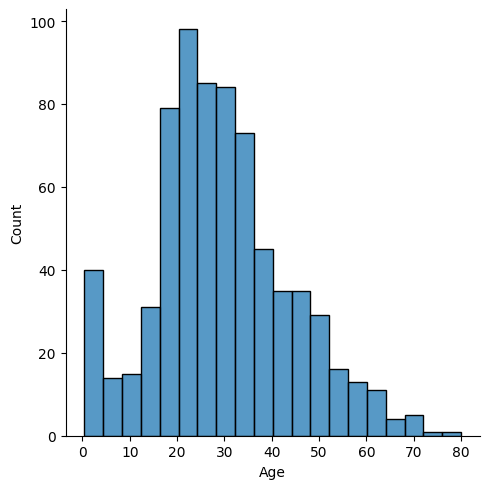

In [8]:
sb.displot(x="Age", data=datos)

In [9]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
datos["Age"].mean()

29.69911764705882

In [11]:
#se decidió rellenar los datos nan con el promedio e edades ya que 177 registros en blanco de edad si es un numero significativo para el tamaño de la muestra
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [12]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [13]:
datos["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [14]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
#se decidió eliminar la columna Cabin ya que hay muchos faltantes y no hay un metodo para completar la información no ayuda al modelo
datos = datos.drop(["Cabin"], axis=1)

KeyError: "['Cabin'] not found in axis"

In [ ]:
datos["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
#eliminamos todas las filas donde exita algun dato faltante nan
datos = datos.dropna()

In [17]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
#borramos las columnas que no nos aportan nada en el objetivo del modelo
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [18]:
#pasamos a numerica nuestro valor categórico Sex
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [20]:
#luego agregamos esas columnas a nuestro data set y borramos la categorica de sex
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

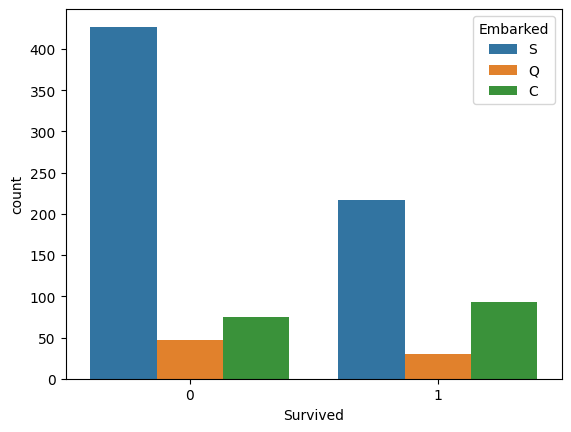

In [21]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [22]:
#pasamos a numercia el valor categórico de Embarked
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

In [23]:
#Agregamos a nuestro data set las nuvas columns numericas y borramos la columna embarked
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

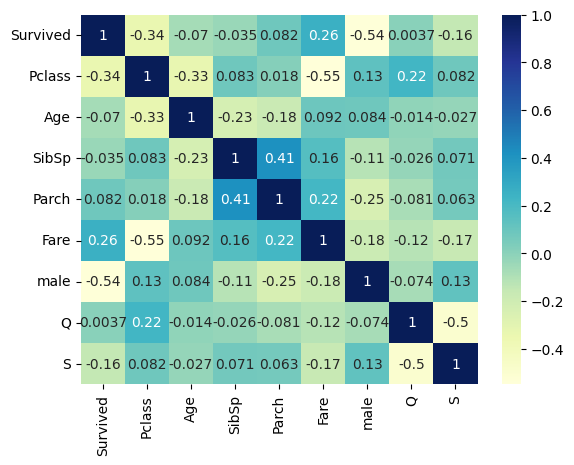

In [24]:
#ahora con todo pasado a numerico revisamos la correlación entra las variables
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

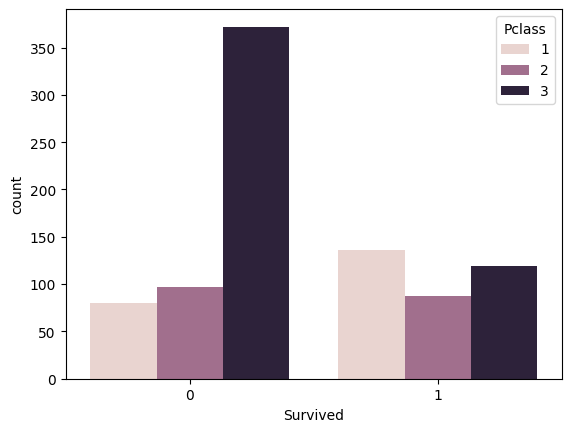

In [25]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [26]:
#ahora separamos nuestras varibles a predecir que en este caso es Survived de las caracteristicas que nos ayudaran a explicar la variable objetivo
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [ ]:
#dividimos nuestra data en prueba y entrenamiento dejando para pruebas un 20%
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [28]:
#entrenamos nuestro modelo
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [29]:
#importamos la metrica que usaremos en este caso la exactidu o accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7653631284916201

In [36]:
#debemos determinar que profundidad maxima usaremos  para entrenar le modelo, por lo cual revisamos como se comportan con profundidades de 1 a 15
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)

Resultado para 1: 0.7430167597765364
Resultado para 2: 0.7150837988826816
Resultado para 3: 0.7821229050279329
Resultado para 4: 0.7486033519553073
Resultado para 5: 0.770949720670391
Resultado para 6: 0.7597765363128491
Resultado para 7: 0.7821229050279329
Resultado para 8: 0.7877094972067039
Resultado para 9: 0.776536312849162
Resultado para 10: 0.7597765363128491
Resultado para 11: 0.7486033519553073
Resultado para 12: 0.7653631284916201
Resultado para 13: 0.7430167597765364
Resultado para 14: 0.7541899441340782


<Axes: >

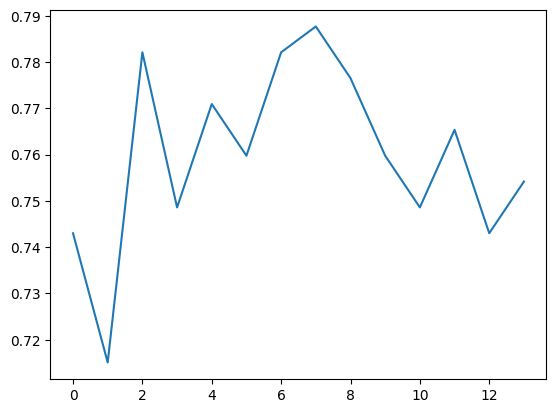

In [37]:
#tanto en esta gráfica con en los resultados anteriores podemos ver que donde alcanza su maxima exactitud es con un max deph de 7
sb.lineplot(data=resultados)

In [38]:
#por lo cual usamos max deph de 7
modelo = DecisionTreeClassifier(max_depth=7)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [40]:
#sacamos algunas metricas para ver como se entreno el modelo y vemos que predice en un 90% los que sobreviven y un 74% los que no sobreviven
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       101
           1       0.90      0.56      0.69        78

    accuracy                           0.78       179
   macro avg       0.82      0.76      0.76       179
weighted avg       0.81      0.78      0.77       179



In [ ]:
# con nuestra matriz de confusión nos dice cuantos si predijo cuando realmente eran no. y cuantos no predijo cuando realmente eran si
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,96,5
Real: Si,34,44


In [42]:
X_ent.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.43833333333333335, 0.9375, 'male <= 0.5\n0.467\n712\n[448, 264]\nMurió'),
 Text(0.20333333333333334, 0.8125, 'Pclass <= 2.5\n0.393\n260\n[70, 190]\nVivió'),
 Text(0.32083333333333336, 0.875, 'True  '),
 Text(0.06, 0.6875, 'Age <= 2.5\n0.106\n143\n[8, 135]\nVivió'),
 Text(0.02666666666666667, 0.5625, 'Pclass <= 1.5\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.013333333333333334, 0.4375, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.04, 0.4375, '0.0\n1\n[0, 1]\nVivió'),
 Text(0.09333333333333334, 0.5625, 'Fare <= 28.856\n0.094\n141\n[7, 134]\nVivió'),
 Text(0.06666666666666667, 0.4375, 'Fare <= 28.231\n0.185\n58\n[6, 52]\nVivió'),
 Text(0.05333333333333334, 0.3125, 'Age <= 56.0\n0.16\n57\n[5, 52]\nVivió'),
 Text(0.02666666666666667, 0.1875, 'SibSp <= 0.5\n0.135\n55\n[4, 51]\nVivió'),
 Text(0.013333333333333334, 0.0625, '0.051\n38\n[1, 37]\nVivió'),
 Text(0.04, 0.0625, '0.291\n17\n[3, 14]\nVivió'),
 Text(0.08, 0.1875, 'Fare <= 18.525\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.06666666666666667, 0.0625, '0.0\n1\n

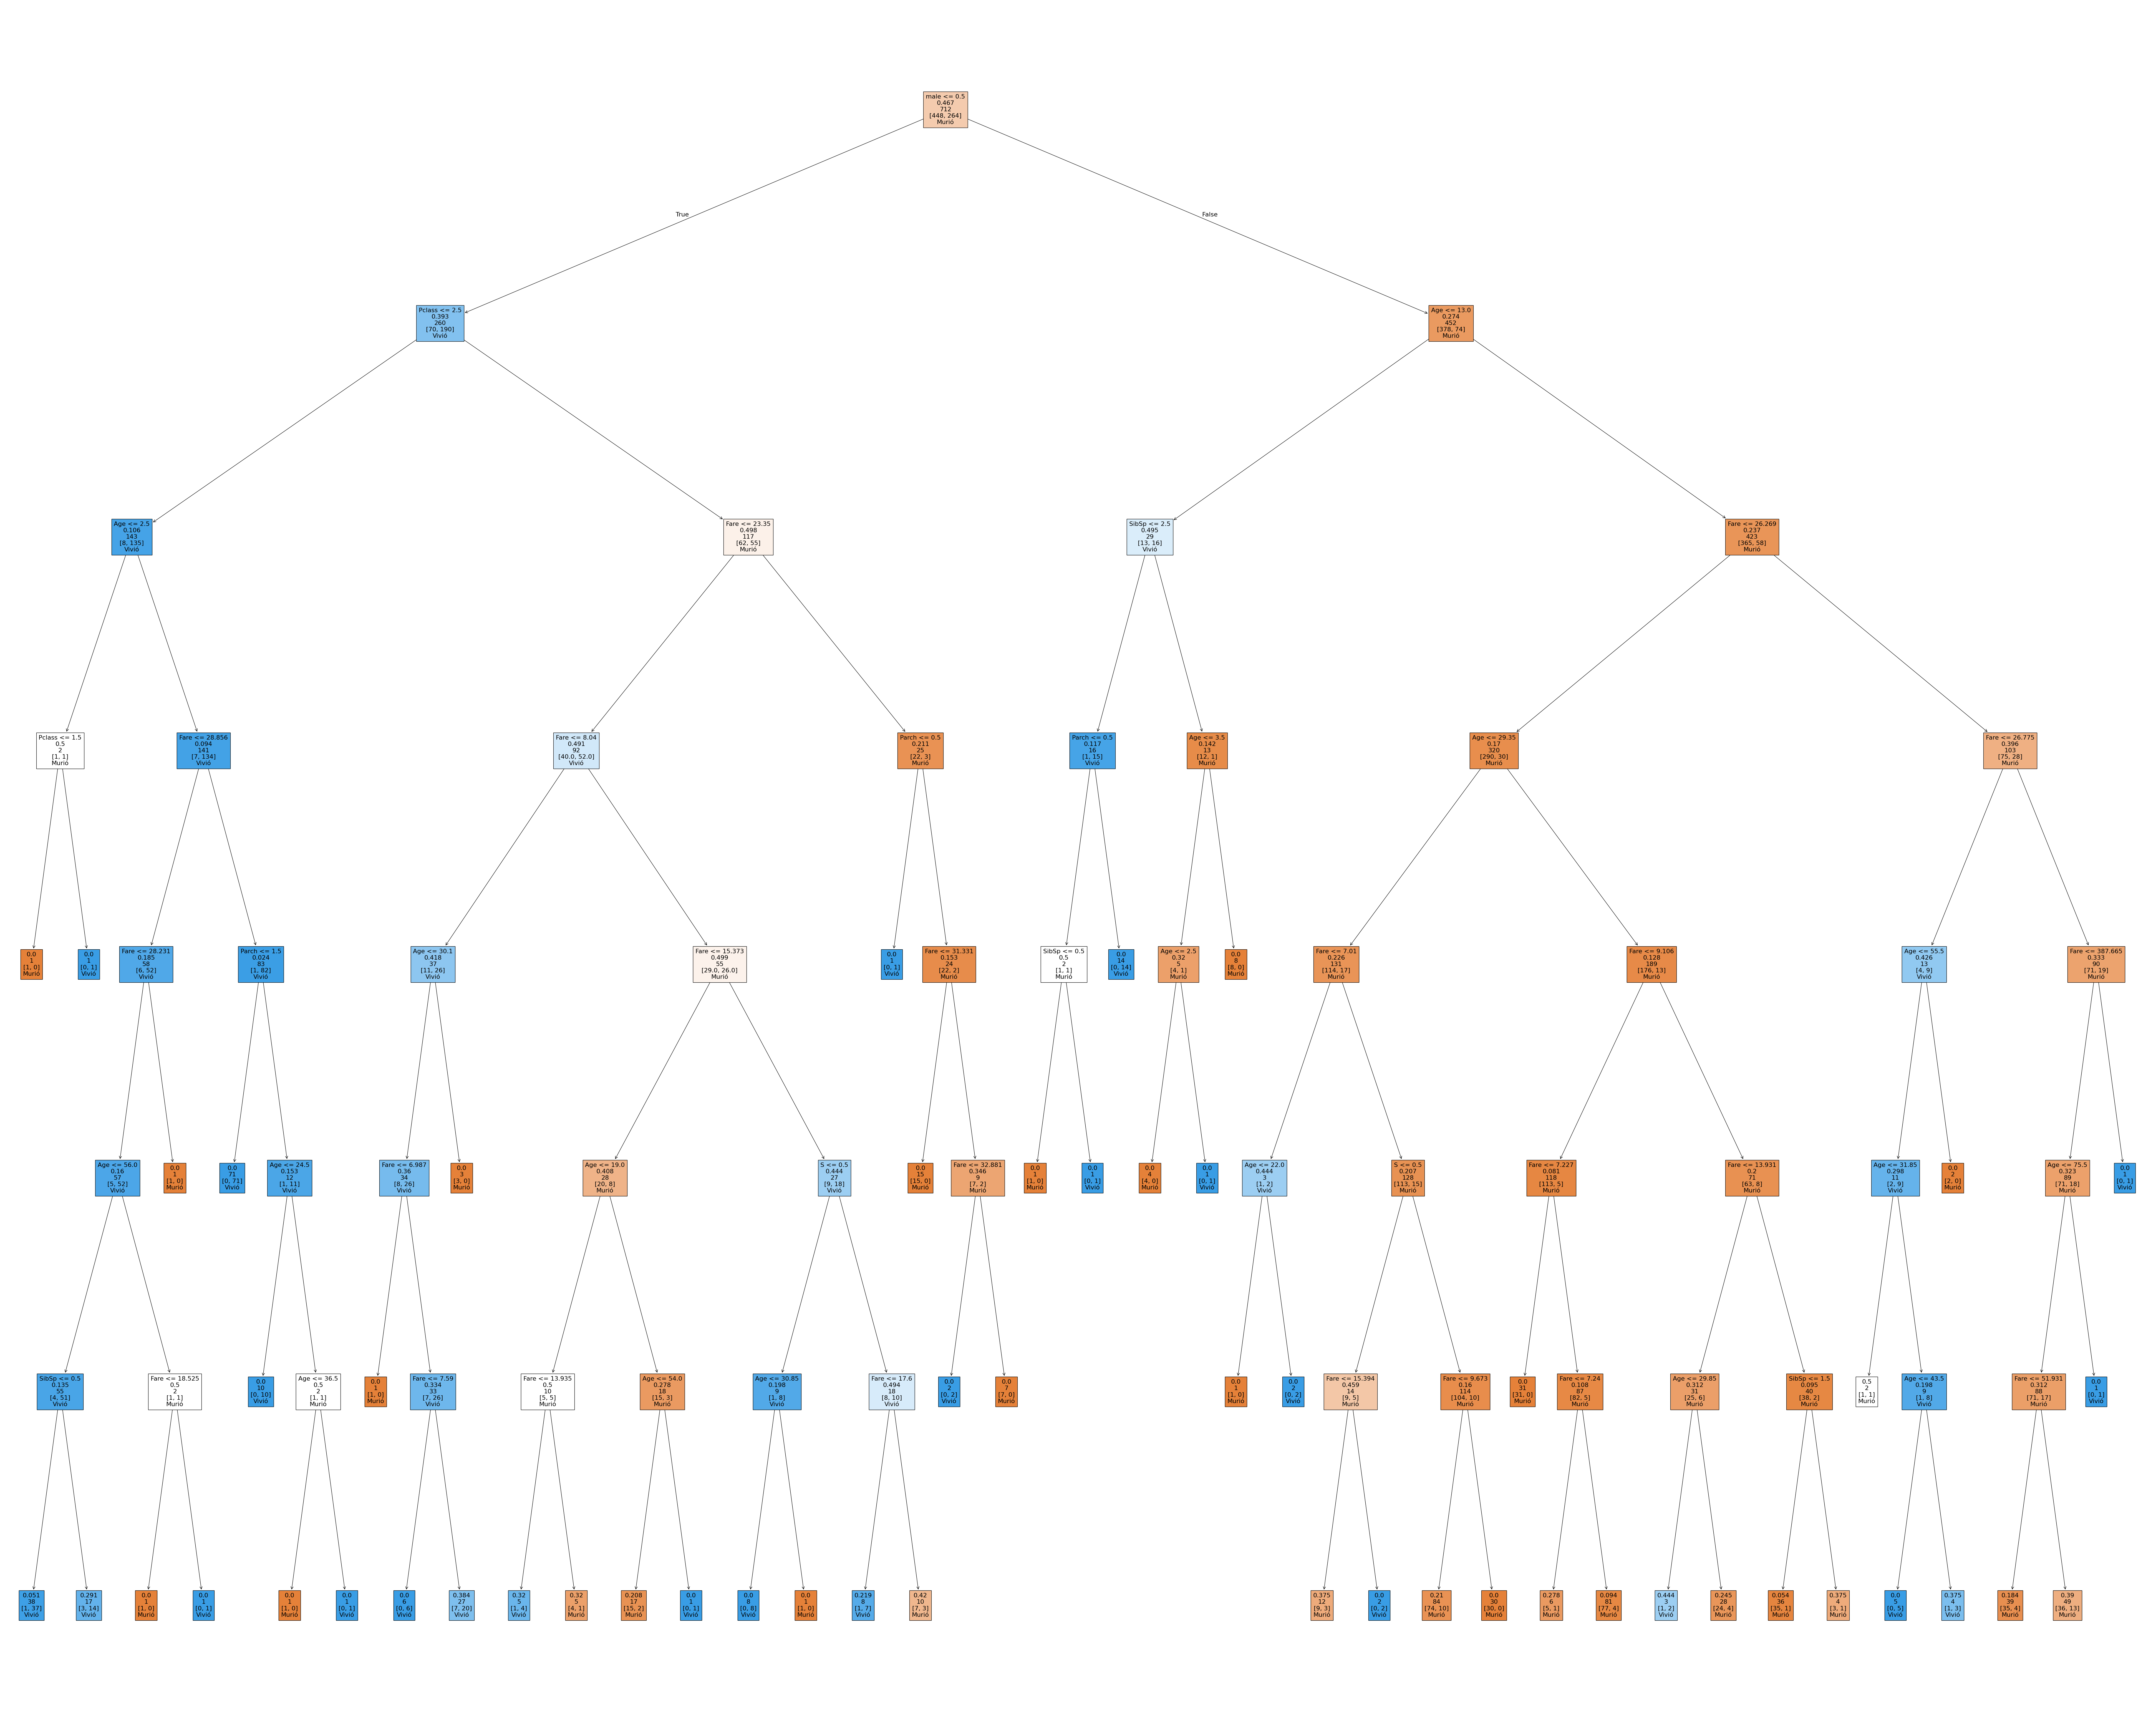

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)

In [48]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [49]:
#hacemos una nueva predicción con datos totalmente nuevos
nueva_persona = [2, 35, 0, 0, 80, 1, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")

No sobreviviste


c:\Users\Erick\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [51]:
#guardando el modelo
# Guardar modelo
import joblib
joblib.dump(modelo, 'modelo_arbol_decision.joblib')

['modelo_arbol_decision.joblib']